In [226]:
import random
import numpy
import copy
import matplotlib.pyplot as plt

In [137]:
class Arm_set :
    count_arms = -1
    epsilon = -1
    Arms = -1
    actions = -1 
    arm = -1
    rewards = -1
    best = -1
    
    def __init__(self,k,esp,desc) :
        self.count_arms = k 
        self.epsilon = esp
        self.Arms = []
        self.actions = 0 
        self.arm = []
        self.rewards = []
        self.best = []  
        for i in range(k) :
            #print(i,desc[i])
            mean = desc[i][0]
            var  = desc[i][1]
            initial = desc[i][2]
            R = desc[i][3]
            self.Arms.append( Arm(mean,var,initial,R) )
            self.arm.append( i )
            
    def Take_Action(self) :
        #print("take action")
        option = numpy.random.binomial(1,self.epsilon,1)[0]
        sel_arm=-1
        if option==1 :
            sel_arm = random.sample(self.arm,1)[0]  
        else :
            sel_arm = self.greedy() 
        best_arm = self.a_best()
        if best_arm == sel_arm :
            Is_best = 1.0 
        else :
            Is_best = 0.0
        self.best.append(Is_best)
        #print(sel_arm)
        rew = self.Arms[sel_arm].update()
        #print(rew)
        #print(rew)
        self.actions = self.actions + 1
        self.rewards.append(rew)
        self.Arms[sel_arm].cal_error() 
        
        self.est_error()
            
    def est_error(self) : 
        for i in range(self.count_arms) :
            self.Arms[i].cal_error1() 
        
    def greedy(self) :
        index=0
        maxi =self.Arms[0].qk
        for i in range(1,self.count_arms) :
            if self.Arms[i].qk > maxi :
                maxi = self.Arms[i].qk 
                index = i 
        return index 
    
    def a_best(self) :
        index=0
        maxi = self.Arms[0].R 
        for i in range(1,self.count_arms) :
            if self.Arms[i].R > maxi :
                maxi = self.Arms[i].R 
                index = i 
        return index
        

In [235]:
class Arm :
    qk=-1
    var=-1
    mean=-1
    d = -1
    k=-1
    error= -1
    error1 = -1
    
    def __init__(self,a,b,c,d) :
        self.mean = a 
        self.var = b 
        self.qk = c 
        self.R = d
        self.k = 0.0
        self.error = []
        self.error1 = []
        
    def update(self) :
        self.k=self.k+1.0 
        award = self.Award(self.mean,self.var)
        #print("ff\t",award)
        self.qk = self.qk + (award-self.qk)/(self.k) 
        return award
    
    def Award(self,mean,var) :
        return self.R + numpy.random.normal(mean,var)
    
    def cal_error(self) :
        diff = abs(self.qk-self.mean) 
        self.error.append(diff)
        
    def cal_error1(self) :
        diff = abs(self.qk-self.mean) 
        self.error1.append(diff)

In [236]:
print("enter number of Episode\n")

enter number of Episode



In [237]:
episodes = int(input())

10000


In [238]:
number_arms = int(input("number of amrs\n"))

number of amrs
10


In [239]:
t_decision = int(input("enter total number of decision\n"))

enter total number of decision
1000


In [240]:
desc=[]

In [241]:
l_R=[0,0.2,.4,.6,.8,1.0,1.2,1.4,1.6,1.8]
intil =[[5.0,0.0] ,[.0,0.1] ]

In [242]:
vari = float( input("enter variance\n") )

enter variance
1


In [243]:
for i in range(number_arms) :
    temp=[]
    temp.append(0)
    temp.append(vari)
    temp.append(intil[0][0])
    temp.append( float( l_R[i] ) )
    desc.append(temp)

In [244]:
overall_perf=[]
ind_arm_perf=[]

for each_set in intil :
    
    for i in range(number_arms) :
        desc[i][2] = each_set[0]
    each_esp = each_set[1]
    s_esp_op=[]
    for e_episode in range(episodes) :
        arm_set = Arm_set(number_arms,each_esp,desc)
        for e_decision in range(t_decision) :
            arm_set.Take_Action()
        
        if e_episode == 0 :
            #print(arm_set.rewards)
            s_esp_op.append(arm_set.best)
            for e_Arm in arm_set.Arms :
                s_esp_op.append( e_Arm.error )
        else :
           
            for e_decision in range(t_decision ) :
                #print(s_esp_op[0][e_decision],arm_set.rewards[e_decision])
                s_esp_op[0][e_decision] = s_esp_op[0][e_decision] + arm_set.best[e_decision]
                
            
                
            for index in range(number_arms) :
                if len(s_esp_op[index+1]) < len( arm_set.Arms[index].error ) :
                    for index1 in range( len(s_esp_op[index+1]) ) :
                        s_esp_op[index+1][index1] = s_esp_op[index+1][index1] + arm_set.Arms[index].error[index1]
                    s_esp_op[index+1] = s_esp_op[index+1][ : len(s_esp_op[index+1]) ]
                else :
                    for index1 in range( len(arm_set.Arms[index].error ) ) :
                        s_esp_op[index+1][index1] = s_esp_op[index+1][index1] + arm_set.Arms[index].error[index1]
                    s_esp_op[index+1] = s_esp_op[index+1][  : len(s_esp_op[index+1]) ]
                        
    
    for index in range( len(s_esp_op) ) :
        for index1 in range( len(s_esp_op[index]) ) :
            s_esp_op[index][index1] = s_esp_op[index][index1]/episodes
            
    overall_perf.append( s_esp_op[0] )
    ind_arm_perf.append( s_esp_op[1:] )

In [245]:
iters = []
for i in range(t_decision) :
    iters.append(i+1)

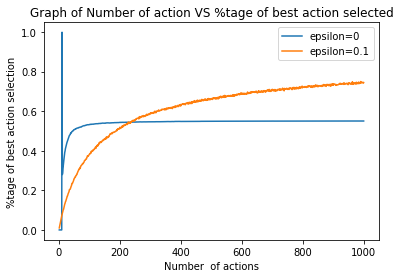

In [246]:
plt.plot(iters,overall_perf[0],label='epsilon=0')
plt.plot(iters,overall_perf[1],label='epsilon=0.1')
plt.title("Graph of Number of action VS %tage of best action selected")
plt.xlabel("Number  of actions")
plt.ylabel("%tage of best action selection")
plt.legend()
plt.show()

1 14


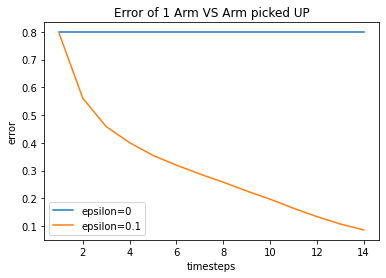

1 10


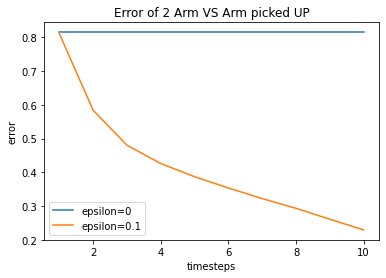

2 16


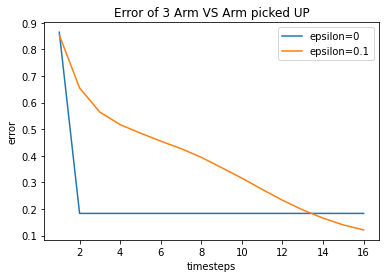

1 15


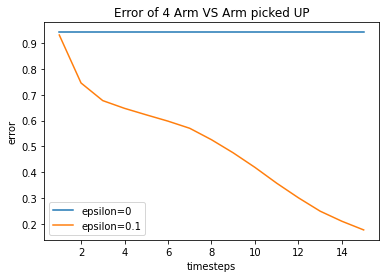

3 9


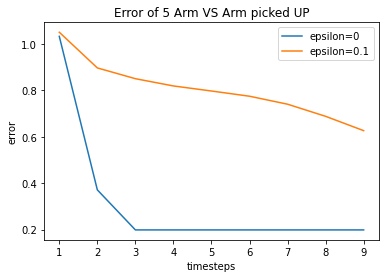

1 11


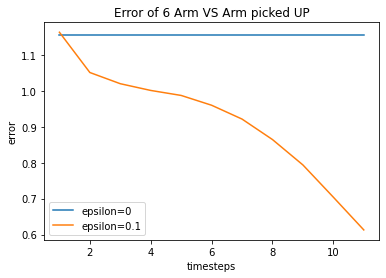

1 10


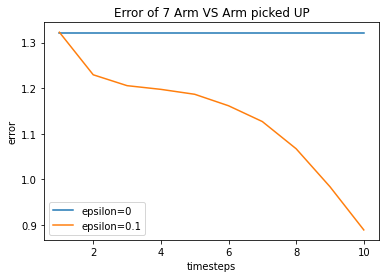

1 30


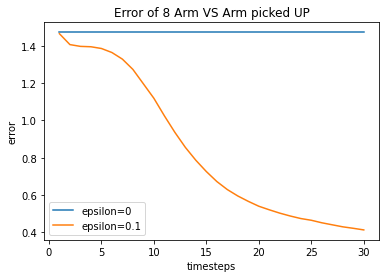

985 12


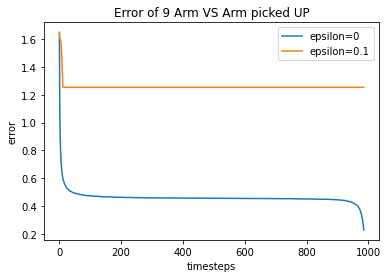

4 873


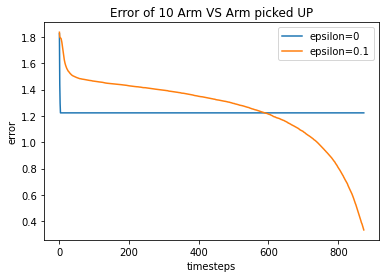

In [247]:
tp = copy.deepcopy(ind_arm_perf)

for i in range(number_arms) :
    lenn=[]
    
    a = len(tp[0][i])
    b = len(tp[1][i])
    maxx = max(a,b) 
    print(a,b)
    if(a>b) :
        last = tp[1][i][-1]
        for j in range(a-b) :
            tp[1][i].append(last) 
    else :
        last = tp[0][i][-1]
        for j in range(b-a):
            tp[0][i].append(last)
            
    for j in range(maxx) :
        lenn.append(j+1)
        
    plt.plot(lenn,tp[0][i],label='epsilon=0')
    plt.plot(lenn,tp[1][i],label='epsilon=0.1')
    plt.xlabel("timesteps")
    plt.ylabel("error")
    plt.title("Error of "+str(i+1)+" Arm VS Arm picked UP")
    plt.legend()
    plt.show()

In [ ]:
plt.plot(iters,ind_arm_perf[1][0])
#plt.plot(iters,ind_arm_perf[1][1])

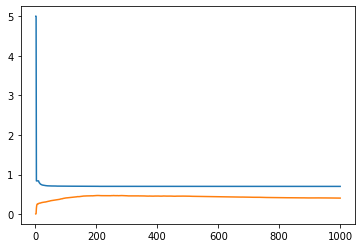

In [167]:
plt.plot(iters,ind_arm_perf[0][2])
plt.plot(iters,ind_arm_perf[1][2])

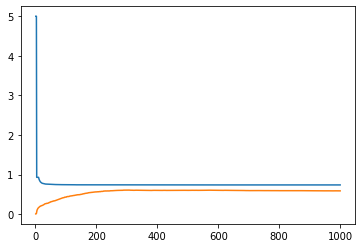

In [168]:
plt.plot(iters,ind_arm_perf[0][3])
plt.plot(iters,ind_arm_perf[1][3])

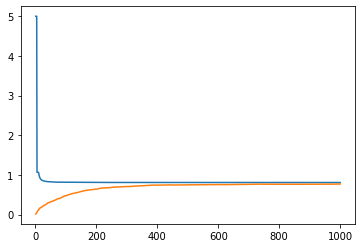

In [177]:
plt.plot(iters,ind_arm_perf[0][4])
plt.plot(iters,ind_arm_perf[1][4])

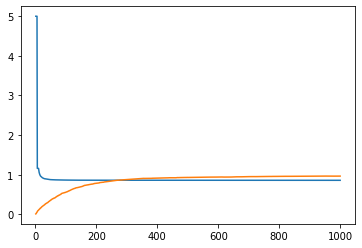

In [175]:
plt.plot(iters,ind_arm_perf[0][5])
plt.plot(iters,ind_arm_perf[1][5])

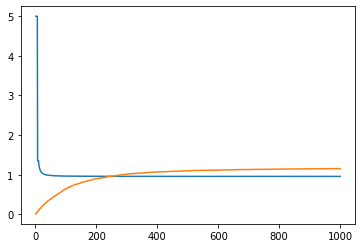

In [176]:
plt.plot(iters,ind_arm_perf[0][6])
plt.plot(iters,ind_arm_perf[1][6])

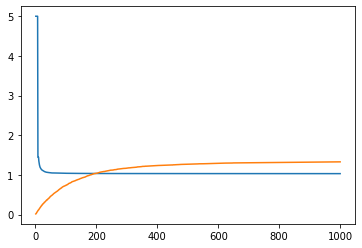

In [179]:
plt.plot(iters,ind_arm_perf[0][7])
plt.plot(iters,ind_arm_perf[1][7])

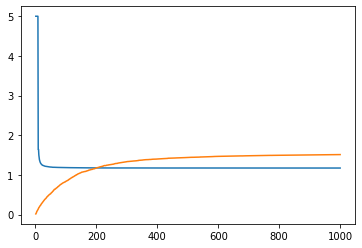

In [180]:
plt.plot(iters,ind_arm_perf[0][8])
plt.plot(iters,ind_arm_perf[1][8])

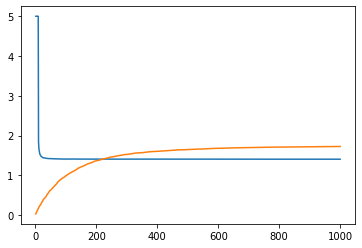

In [181]:
plt.plot(iters,ind_arm_perf[0][9])
plt.plot(iters,ind_arm_perf[1][9])

In [193]:
arm_set.Arms[4].qk

1.0048461030199844